In [1]:
from utils import *

In [27]:
import pandas as pd
import numpy as np
from scipy import stats
from scipy.stats import binom
from scipy.stats import binomtest
import matplotlib.pyplot as plt


Para calcular probabilidades con la binomial tengo

* puntual :  binom.pmf(x, n, p)
* acumulada : binom.cdf(x, n, p)

#### Ejercicio 1 

Ho: p=0.7 

H1: p<0.7

In [5]:
n = 15
p = 0.7
r = 7

a - Calcular nivel de significacion del test

In [13]:
# se rechaza cuando T<=7, alfa sera la probabildiad de reachazar H0 con H0 verdadera, entonces

alfa = binom.cdf(7,n,p)
alfa

0.05001254005377603

b - Funcion de potencia y probabilidad tipo 2 con p=0.5 y p=0.3

Potencia, probabilidad de rechazar Ho con Ho Falsa

In [16]:
potencia_1 = binom.cdf(7,n,0.5)
potencia_2 = binom.cdf(7,n,0.3)
print(potencia_1,potencia_2)

0.5000000000000001 0.949987459946224


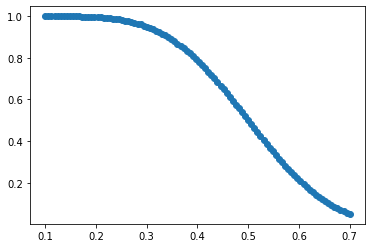

In [24]:
# No lo pide pero dibujo una funcion de potencia para ver como quedaria para mas valores de p posibles dentro de H1

potencias = []
xs = []
for x in np.linspace(0.1, 0.7, num=100):
    xs.append(x)
    potencias.append(binom.cdf(7,n,x))
plt.scatter(xs,potencias)

c - Si en una muestra de tamaño 15 se obtuvieron 9 respuestas exitosas, concluir acerca del valor de
p. ¿Que tipo de error puede cometerse al llegar a esa conclusion?

Uso las dos formas

In [31]:
binomtest(9, n=15, p=0.7, alternative='less')


BinomTestResult(k=9, n=15, alternative='less', proportion_estimate=0.6, pvalue=0.2783785597956361)

In [32]:
test_binomial(9,15,0.7,alfa,"izquierda")

{'nivel_significacion': 0.05001254005377603,
 'k': 8,
 'p_estimado': 0.6,
 'pvalor': 0.2783785597956361}

Como el p valor > alfa entonces, no rechazo H0. Como no rechace Ho, puede ser que este aceptando H0 siendo esta falsa, puedo estar cometiendo el error tipo 2.